# Visualize the different noise schedules and weighting functions

In [1]:
import matplotlib.pyplot as plt
import torch

from diffusion_model import SDE, weighting_function, generate_diffusion_time

Kernel type: variance_preserving, noise schedule: linear
t_min: 0.0005980199202895164, t_max: 3.872983455657959
alpha, sigma: (tensor(1.0000), tensor(0.0006)) (tensor(0.0006), tensor(1.0000))
Kernel type: variance_preserving, noise schedule: linear
t_min: 0.0005980199202895164, t_max: 3.872983455657959
alpha, sigma: (tensor(1.0000), tensor(0.0006)) (tensor(0.0006), tensor(1.0000))
Kernel type: variance_preserving, noise schedule: cosine
t_min: 0.00035210439818911254, t_max: 0.999647855758667
alpha, sigma: (tensor(1.0000), tensor(0.0006)) (tensor(0.0006), tensor(1.0000))
Kernel type: variance_preserving, noise schedule: cosine
t_min: 0.00035210439818911254, t_max: 0.999647855758667
alpha, sigma: (tensor(1.0000), tensor(0.0006)) (tensor(0.0006), tensor(1.0000))
Kernel type: variance_preserving, noise schedule: cosine
t_min: 0.002601705025881529, t_max: 0.9999523162841797
alpha, sigma: (tensor(1.0000), tensor(0.0006)) (tensor(0.0006), tensor(1.0000))
Kernel type: variance_preserving, nois

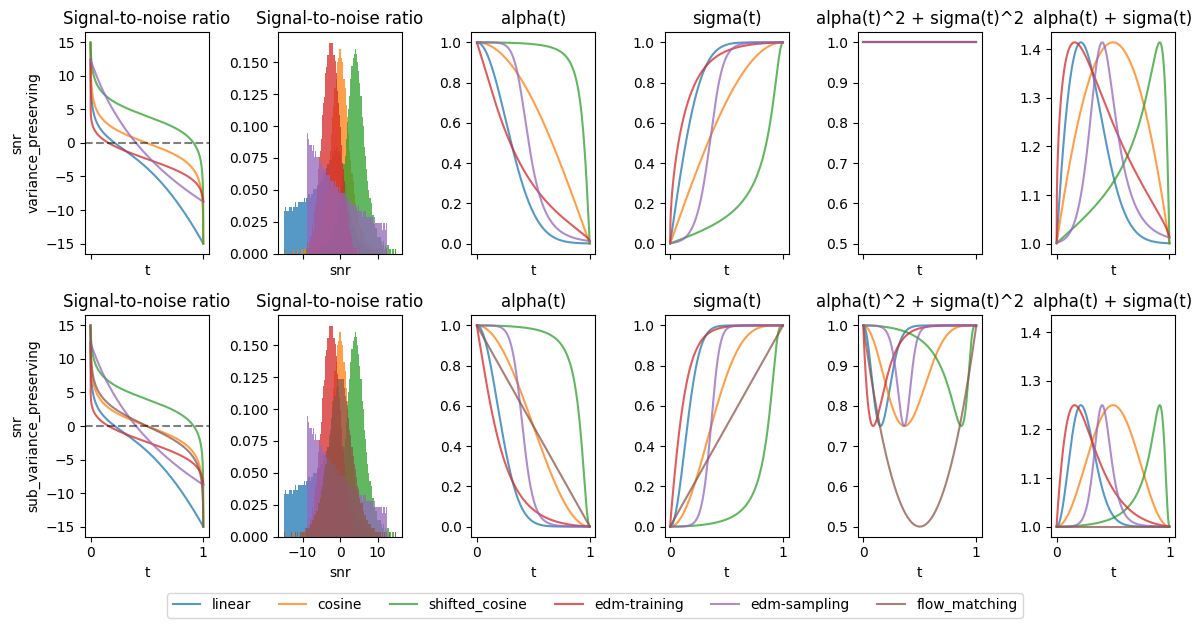

In [2]:
# plot the different snrs
t = torch.linspace(0, 1, 1000)
bins = 100

sub_vp = ['', 'sub_'][0]

fig, ax = plt.subplots(2, 6, sharex='col', sharey='col', figsize=(12, 6), tight_layout=True)
for a, sub_vp in zip(ax, ['', 'sub_']):
    snr = SDE(sub_vp+'variance_preserving', 'linear').get_snr(t)
    h1 = a[0].plot(t, snr, label='linear', alpha=0.75)
    a[1].hist(snr, bins=bins, density=True, alpha=0.75)
    alpha, sigma = SDE(sub_vp+'variance_preserving', 'linear').kernel(log_snr=snr)
    a[2].plot(t, alpha, label='linear', alpha=0.75)
    a[3].plot(t, sigma, label='linear', alpha=0.75)
    a[4].plot(t, alpha**2+sigma**2, label='linear', alpha=0.75)
    a[5].plot(t, alpha+sigma, label='linear', alpha=0.75)

    snr = SDE(sub_vp+'variance_preserving', 'cosine').get_snr(t)
    h2 = a[0].plot(t, snr, label='cosine', alpha=0.75)
    a[1].hist(snr, bins=bins, density=True, alpha=0.75)
    alpha, sigma = SDE(sub_vp+'variance_preserving', 'cosine').kernel(log_snr=snr)
    a[2].plot(t, alpha, label='cosine', alpha=0.75)
    a[3].plot(t, sigma, label='cosine', alpha=0.75)
    a[4].plot(t, alpha**2+sigma**2, label='cosine', alpha=0.75)
    a[5].plot(t, alpha+sigma, label='cosine', alpha=0.75)

    snr = SDE(sub_vp+'variance_preserving', 'cosine', s_shift_cosine=2.).get_snr(t)
    h3 = a[0].plot(t, snr, label='shifted_cosine', alpha=0.75)
    a[1].hist(snr, bins=bins, density=True, alpha=0.75)
    alpha, sigma = SDE(sub_vp+'variance_preserving', 'cosine', s_shift_cosine=2.).kernel(log_snr=snr)
    a[2].plot(t, alpha, label='shifted_cosine', alpha=0.75)
    a[3].plot(t, sigma, label='shifted_cosine', alpha=0.75)
    a[4].plot(t, alpha**2+sigma**2, label='shifted_cosine', alpha=0.75)
    a[5].plot(t, alpha+sigma, label='shifted_cosine', alpha=0.75)

    snr = SDE(sub_vp+'variance_preserving', 'edm-training').get_snr(t)
    h4 = a[0].plot(t, snr, label='edm-training', alpha=0.75)
    a[1].hist(snr, bins=bins, density=True, alpha=0.75)
    alpha, sigma = SDE(sub_vp+'variance_preserving', 'edm-training').kernel(log_snr=snr)
    a[2].plot(t, alpha, label='edm-training', alpha=0.75)
    a[3].plot(t, sigma, label='edm-training', alpha=0.75)
    a[4].plot(t, alpha**2+sigma**2, label='edm-training', alpha=0.75)
    a[5].plot(t, alpha+sigma, label='edm-training', alpha=0.75)

    snr = SDE(sub_vp+'variance_preserving', 'edm-sampling').get_snr(t)
    h5 = a[0].plot(t, snr, label='edm-sampling', alpha=0.75)
    a[1].hist(snr, bins=bins, density=True, alpha=0.75)
    alpha, sigma = SDE(sub_vp+'variance_preserving', 'edm-sampling').kernel(log_snr=snr)
    a[2].plot(t, alpha, label='edm-sampling', alpha=0.75)
    a[3].plot(t, sigma, label='edm-sampling', alpha=0.75)
    a[4].plot(t, alpha**2+sigma**2, label='edm-sampling', alpha=0.75)
    a[5].plot(t, alpha+sigma, label='edm-sampling', alpha=0.75)

    if sub_vp == 'sub_':
        snr = SDE(sub_vp+'variance_preserving', 'flow_matching').get_snr(t)
        h6 = a[0].plot(t, snr, label='flow_matching', alpha=0.75)
        a[1].hist(snr, bins=bins, density=True, alpha=0.75)
        alpha, sigma = SDE(sub_vp+'variance_preserving', 'flow_matching').kernel(log_snr=snr)
        a[2].plot(t, alpha, label='flow_matching', alpha=0.75)
        a[3].plot(t, sigma, label='flow_matching', alpha=0.75)
        a[4].plot(t, alpha**2+sigma**2, label='flow_matching', alpha=0.75)
        a[5].plot(t, alpha+sigma, label='flow_matching', alpha=0.75)

    # dotted line at 0
    a[0].axhline(0, color='black', linestyle='--', alpha=0.5)

    for axis in a:
        axis.set_xlabel('t')
    a[1].set_xlabel('snr')
    a[0].set_ylabel(f'snr\n{sub_vp}variance_preserving')
    a[0].set_title(f'Signal-to-noise ratio')
    a[1].set_title(f'Signal-to-noise ratio')
    a[2].set_title(f'alpha(t)')
    a[3].set_title(f'sigma(t)')
    a[4].set_title(f'alpha(t)^2 + sigma(t)^2')
    a[5].set_title(f'alpha(t) + sigma(t)')
fig.legend(handles=h1+h2+h3+h4+h5+h6, loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.05))
#plt.savefig('plots/noise schedules.png', bbox_inches='tight')
plt.show()

In [ ]:
# plot the different snrs
t = torch.linspace(0, 1, 1000)
bins = 100

fig, ax = plt.subplots(1, 1, sharex='col', sharey='col', figsize=(4, 3), tight_layout=True)
snr = SDE('variance_preserving', 'linear').get_snr(t)
h1 = ax.plot(t, snr, label='linear', alpha=0.75)

snr = SDE('variance_preserving', 'cosine').get_snr(t)
h2 = ax.plot(t, snr, label='cosine', alpha=0.75)

snr = SDE('variance_preserving', 'cosine', s_shift_cosine=4.).get_snr(t)
h3 = ax.plot(t, snr, label='shifted_cosine', alpha=0.75)

snr = SDE('variance_preserving', 'edm-training').get_snr(t)
h4 = ax.plot(t, snr, label='edm-training', alpha=0.75)

snr = SDE('variance_preserving', 'edm-sampling').get_snr(t)
h5 = ax.plot(t, snr, label='edm-sampling', alpha=0.75)

# dotted line at 0
ax.axhline(0, color='black', linestyle='--', alpha=0.5)

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\log$ snr')
ax.set_title(f'Signal-to-noise ratio')
fig.legend(handles=h1+h2+h3+h4+h5, loc='upper right', ncol=1, bbox_to_anchor=(1.4, 0.9))
#plt.savefig('plots/noise schedules snr.png', bbox_inches='tight')
plt.show()

In [ ]:
t = torch.linspace(0, 1, 1000)
x_0 = torch.tensor([0.01])

fig, ax = plt.subplots(2, 2, sharex='col', sharey='col', figsize=(5, 4), tight_layout=True)
for a, sub_vp in zip(ax, ['', 'sub_']):
    f, g = SDE(sub_vp+'variance_preserving', 'linear').get_f_g(t, x=x_0)
    h1 = a[0].plot(t, f, label='linear', alpha=0.75)
    a[1].plot(t, g, label='linear', alpha=0.75)

    f, g = SDE(sub_vp+'variance_preserving', 'cosine').get_f_g(t, x=x_0)
    h2 = a[0].plot(t, f, label='cosine', alpha=0.75)
    a[1].plot(t, g, label='cosine', alpha=0.75)

    if sub_vp == 'sub_':
        f, g = SDE(sub_vp+'variance_preserving', 'flow_matching').get_f_g(t, x=x_0)
        h4 = a[0].plot(t, f, label='flow_matching', alpha=0.75)
        a[1].plot(t, g, label='flow_matching', alpha=0.75)

    for axis in a:
        axis.set_xlabel('t')
    a[0].set_ylabel(f'snr\n{sub_vp}variance_preserving')
    a[0].set_title(f'f(z={round(x_0.item(), 2)},t)')
    a[1].set_title(f'g(t)')
fig.legend(handles=h1+h2+h4, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))
plt.show()

In [ ]:
# plot the kernel
t = generate_diffusion_time(1000)
sde_test = SDE('variance_preserving', 'linear')
snr = sde_test.get_snr(t=t)

fig, ax = plt.subplots(2, 5, sharex='row', sharey='row', figsize=(9, 6), tight_layout=True)
for a, wt in zip(ax.T, [None, 'likelihood_weighting', 'sigmoid', 'min-snr', 'edm']):
    w = weighting_function(t, sde_test, weighting_type=wt)
    a[0].plot(t, w / max(w))
    a[0].set_xlabel(r'$t$')
    a[0].set_ylabel('Normalized weight')
    a[0].set_title(wt)

    a[1].plot(snr, w / max(w))
    a[1].set_xlabel(r'$\lambda$')
    a[1].set_ylabel('Normalized weight')
    a[0].set_title(wt)
#plt.savefig(f'plots/weighting_functions_{sde_test.noise_schedule}.png', bbox_inches='tight')
plt.show()

In [ ]:
# plot the kernel
t = generate_diffusion_time(1000)
sde_test = SDE('variance_preserving', 'cosine')
snr = sde_test.get_snr(t)

fig, ax = plt.subplots(2, 6, sharex='row', sharey='row', figsize=(12, 6), tight_layout=True)
for a, wt in zip(ax.T, [None, 'likelihood_weighting', 'flow_matching', 'sigmoid', 'min-snr', 'edm']):
    w = weighting_function(t, sde_test, weighting_type=wt)
    a[0].plot(t, w / max(w))
    a[0].set_xlabel(r'$t$')
    a[0].set_ylabel('Normalized weight')
    a[0].set_title(wt)

    a[1].plot(snr, w / max(w))
    a[1].set_xlabel(r'$\lambda$')
    a[1].set_ylabel('Normalized weight')
    a[0].set_title(wt)
#plt.savefig(f'plots/weighting_functions_{sde_test.noise_schedule}.png', bbox_inches='tight')
plt.show()

In [ ]:
# plot the kernel
t = generate_diffusion_time(1000)
sde_test = SDE('sub_variance_preserving', 'flow_matching')
snr = sde_test.get_snr(t=t)

fig, ax = plt.subplots(2, 6, sharex='row', sharey='row', figsize=(12, 6), tight_layout=True)
for a, wt in zip(ax.T, [None, 'likelihood_weighting', 'flow_matching', 'sigmoid', 'min-snr', 'edm']):
    w = weighting_function(t, sde_test, weighting_type=wt)
    a[0].plot(t, w / max(w))
    a[0].set_xlabel(r'$t$')
    a[0].set_ylabel('Normalized weight')
    a[0].set_title(wt)

    a[1].plot(snr, w / max(w))
    a[1].set_xlabel(r'$\lambda$')
    a[1].set_ylabel('Normalized weight')
    a[0].set_title(wt)
#plt.savefig(f'plots/weighting_functions_{sde_test.noise_schedule}.png', bbox_inches='tight')
plt.show()

In [ ]:
# plot the kernel
t = generate_diffusion_time(1000)
sde_test = SDE('variance_preserving', 'edm-training')
snr = sde_test.get_snr(t=t)

fig, ax = plt.subplots(2, 4, sharex='row', sharey='row', figsize=(12, 6), tight_layout=True)
for a, wt in zip(ax.T, [None,'sigmoid', 'min-snr', 'edm']):
    w = weighting_function(t, sde_test, weighting_type=wt)
    a[0].plot(t, w / max(w))
    a[0].set_xlabel(r'$t$')
    a[0].set_ylabel('Normalized weight')
    a[0].set_title(wt)

    a[1].plot(snr, w / max(w))
    a[1].set_xlabel(r'$\lambda$')
    a[1].set_ylabel('Normalized weight')
    a[0].set_title(wt)
#plt.savefig(f'plots/weighting_functions_{sde_test.noise_schedule}.png', bbox_inches='tight')
plt.show()